In [2]:
import numpy as np
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore')

In [3]:
## read dataset
data = pd.read_csv('/kaggle/input/livin-by-mandiri-app-reviews/reviews.csv')

## 1. EDA

In [4]:
## see five row of data
data.head()

,date,review,rating,thumbs_up,version
0,2021-09-30 06:12:53,"Udah di coba, keren dan responsive, dengan tam...",5,36,1.0.0
1,2021-09-30 06:33:15,Excellent,5,0,1.0.0
2,2021-09-30 06:48:30,Keren. Cakep benar semakin canggih. Terdepan t...,5,22,1.0.0
3,2021-09-30 06:56:05,mantap,5,0,NaN
4,2021-09-30 07:02:21,Mantap,5,0,1.0.0


In [5]:
## how many rows and columns in the data
data.shape

(155192, 5)

**it's show it have 155192 rows and 5 column**

In [6]:
## info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155192 entries, 0 to 155191
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       155192 non-null  object
 1   review     155192 non-null  object
 2   rating     155192 non-null  int64 
 3   thumbs_up  155192 non-null  int64 
 4   version    118714 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.9+ MB


In [7]:
## check nan value in data
data.isnull().sum()

date             0
review           0
rating           0
thumbs_up        0
version      36478
dtype: int64

__version column have 36478 missing value__

In [8]:
## descriptive statistic for numeric variable
data.describe()

,rating,thumbs_up
count,155192.000000,155192.000000
mean,3.616243,0.611926
std,1.727234,14.687691
min,1.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,2397.000000


**rating range from 1 to 5 and rating, and thumbs_up (like) for particular reviews range from 0 to 2397**

In [9]:
## rating count for ratings 1 to 5
data['rating'].value_counts()

rating
5    86215
1    39183
4    10951
3     9464
2     9379
Name: count, dtype: int64

**most people give 5 rating for this app**

In [10]:
## see the numbers of like for particular review
data['thumbs_up'].value_counts().sort_index()

thumbs_up
0       142569
1         8762
2         1604
3          528
4          255
         ...  
1218         1
1278         1
1481         1
1588         1
2397         1
Name: count, Length: 221, dtype: int64

In [11]:
## see the review for the most likes on it
with pd.option_context('display.max_colwidth', None):
    display(data.loc[data['thumbs_up'] == 2397, ['review', 'rating']])

,review,rating
149475,"Setelah sy update awal oktober barusan, aplikasi livin jadi susah sekali diakses. Setiap diklik utk login hanya berkedip 2 detik, aplikasi otomatis keluar tanpa keterangan. Sy sampe 2 kali uninstall dan install kembali, tp tetap terjadi. Apa mungkin versi update barusan tidak cocok dengan hp sy ya.",1


**most likes for review is review with rating of 1**

In [12]:
data.describe(include=object)

,date,review,version
count,155192,155192,118714
unique,152208,106671,10
top,2022-02-25 11:47:50,Mantap,1.0.2
freq,5,5065,43902


__from the above information, most user reviews say "Mantap", most user app version is 1.0.2.__

In [13]:
data['rating'].value_counts(normalize=True).mul(100).round(2)

rating
5    55.55
1    25.25
4     7.06
3     6.10
2     6.04
Name: proportion, dtype: float64

__most users give 5 rating for the app with total precentage 55.55%__

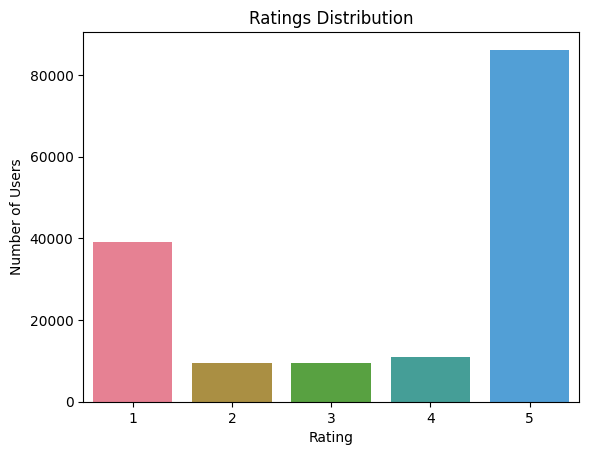

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# count plot for rating
palette = "husl"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Ratings Distribution')

plt.show()

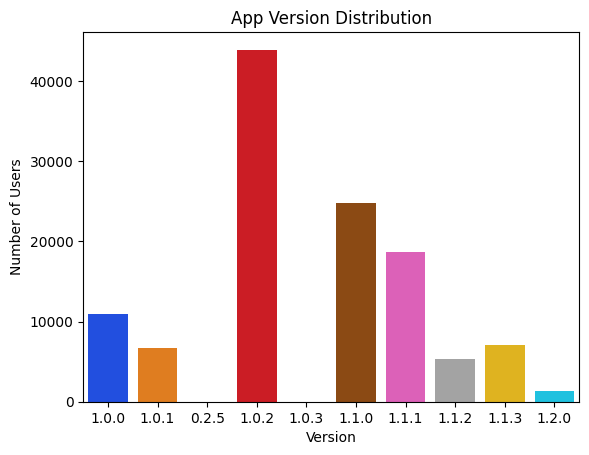

In [15]:
## count plot for app version that user use
palette = "bright"
sns.set_palette(palette)

sns.countplot(data=data, x='version')

plt.xlabel('Version')
plt.ylabel('Number of Users')
plt.title('App Version Distribution')

plt.show()

## 2. Data Cleaning

In [16]:
## drop several columns that wouldn't used for model training
data = data.drop(columns=['date','thumbs_up', 'version'])

In [17]:
## check column name for data
data.columns

Index(['review', 'rating'], dtype='object')

In [18]:
## check missing value
data.isnull().sum()

review    0
rating    0
dtype: int64

In [19]:
## make new column sentiment
## if rating == 5, then assign 1 (Positive Sentiment) for sentiment column
## if rating == 1, then assign 0 (Negative Sentiment) for sentiment column
## if rating == 2,3,4 then assign NA for sentiment column
data['sentiment'] = data['rating'].apply(lambda x : 0 if x == 1 else (1 if x == 5 else None))

In [20]:
## check value counts for each category on sentiment column
data.sentiment.value_counts(dropna=False)

sentiment
1.0    86215
0.0    39183
NaN    29794
Name: count, dtype: int64

**in sentiment column, total positive sentiment 86,215, and negative sentiment 39,183**

In [21]:
## drop rating column
data.drop(columns = 'rating', inplace=True, axis = 1)

In [22]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [23]:
## take 10000 positive review and negatif review
negatif = data[data['sentiment'] == 0].sample(10000, random_state=123)
positif = data[data['sentiment'] == 1].sample(10000, random_state=123)

## concate positive and negatif review 
## to solve imblance label in the dataset
data = pd.concat([positif, negatif])

In [24]:
data.shape

(20000, 2)

In [25]:
data['sentiment'].value_counts()

sentiment
1.0    10000
0.0    10000
Name: count, dtype: int64

In [26]:
## print 5 negative sentiments for review
for review in data.loc[data['sentiment'] == 0, 'review'].head(5):
    print(review)

livin mandiri lebih buruk dari pada mandiri yg biasa.. ini kesalahan terbesar mandiri, menurunkan kualitas kenyamanan aplikasi, lebih ribet dan tidak fleksibel sama sekali
Aplikasinya cuma bisa dipake buat intip saldo.. dipake login buat transaksi tidak bisa sama sekali, malah cenderung force close.. ngga membantu sama sekali ke customer disaat harus transaksi mobile.. lebih baik balikin lg aja ke versi biru yg jauh lebih baik daripada ini.. daripada memaksakan merubah sesuatu yg belum jelas, ibaratnya mudharatnya lebih besar dibanding manfaatnya (kalo boleh saran lebih baik aktifkan lg fungsi internet banking yg ga mengharuskan semua trx harus terkoneksi mobile)
SMS verifikasi tidak kunjung dibalas, saya sudah mengirim sampai 10x tp tidak ada respon balasan. Mohon bantuannya, sebelumnya sy make Livin warna biru bisa knp sekarang pindah di gold tidak bisa.
Gak bisa download logo kuning .. tolong kembalikan logo birunya jadi gak bisa transaksi nih gara2 di paksa pindah kuning
Banyak kur

In [27]:
## print 5 positive sentiment for review
for review in data.loc[data['sentiment'] == 1, 'review'].head(5):
    print(review)

👍
Mudah nya isi e-money 👍👍👍👍👍
Sy puas senang dengan adanya livin ini sangat mebantu kami
Bagus daan cepet
Terima kasih atas penjelasan dan bantuanya Puas dan benar" enak pakai m bangking yg skrg


In [28]:
import re

def get_cleaned_text(df, col):
    sentence = []
    
    for word in df[col][:]:
        review = re.sub('[^a-zA-Z]', ' ', word) # clean character thats not a-z, and A-Z
        review = review.lower() # lower case for review
        review = review.split() # split review for removing extra spaces
        review = ' '.join(review) # join review again
        sentence.append(review) # add review to sentence list
        
    return sentence
        

In [29]:
data['review'] = get_cleaned_text(data, 'review')

In [30]:
data['review'].head(20)

125278                                                     
6465                                  mudah nya isi e money
79776     sy puas senang dengan adanya livin ini sangat ...
117282                                     bagus daan cepet
42455     terima kasih atas penjelasan dan bantuanya pua...
31208                                                mantap
10649                                           sanga bagus
122681                                                  oke
107396                                               mantap
24364                                                mantap
93295                                                mantep
136510                                               mantap
84408                                                mantap
78524                                                   iye
74762                                                  good
21577                                                mantab
116125                   kenapa sampai t

In [31]:
## apply stopword
from nltk.corpus import stopwords
all_stopwords = stopwords.words('indonesian')

In [32]:
## remove stopword from review column
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in all_stopwords))

In [33]:
data.head(20)

,review,sentiment
125278,,1.0
6465,mudah nya isi e money,1.0
79776,sy puas senang livin mebantu,1.0
117282,bagus daan cepet,1.0
42455,terima kasih penjelasan bantuanya puas enak pa...,1.0
31208,mantap,1.0
10649,sanga bagus,1.0
122681,oke,1.0
107396,mantap,1.0
24364,mantap,1.0


**it show after cleaning the review column, it's have some missing value identifying with a blank record**

In [34]:
## replace blank with pd.NA
data['review'].replace('', pd.NA, inplace=True)

In [35]:
## check total missing value
data.isna().sum()

review       504
sentiment      0
dtype: int64

**it has 504 missing values in review column**

In [36]:
## drop missing value
data.dropna(inplace=True)

In [39]:
import stanza
stanza.download('id')

In [41]:
nlp = stanza.Pipeline(lang='id', processor='tokenize,lemma')

In [42]:
## make function to lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([word.lemma for sent in doc.sentences for word in sent.words])
    return lemmatized_text

In [ ]:
## make new column review_lemmatized
## apply lemmatize_text function for review column to store in review_lemmatized column
data['review_lemmatized'] = data['review'].apply(lemmatize_text)

In [ ]:
## save data after apply lemmatization into csv
data.to_csv('data_clean.csv', index=False)

In [43]:
## load data after cleaning
data = pd.read_csv('/kaggle/input/review-bank-mandiri-clean/data_clean.csv')
data.head()

,review,sentiment,review_lemmatized
0,mudah nya isi e money,1.0,mudah nya isi e money
1,sy puas senang livin mebantu,1.0,sy puas senang livin bantu
2,bagus daan cepet,1.0,bagus daan cepet
3,terima kasih penjelasan bantuanya puas enak pa...,1.0,terima kasih jelas bantua dia puas enak pagai ...
4,mantap,1.0,mantap


## 3. Model Training

In [44]:
## divide data into X and Y
## applly bag of word for independent feature
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['review_lemmatized']).toarray()
Y = data['sentiment']

In [46]:
## save count-vectorizer into pkl file
import pickle
pickle.dump(cv, open('count-vectorizer.pkl', 'wb'))

In [47]:
## divide train and test from data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

In [48]:
## make model_evaluation function for model
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

def model_evaluation (true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy,confusionmatrix,precision,recall

In [49]:
## train data on several models
from sklearn.tree import DecisionTreeClassifier ## decision tree model
from sklearn.linear_model import LogisticRegression ## logistic regression model
from sklearn.neighbors import KNeighborsClassifier ## KNN model
from sklearn.ensemble import RandomForestClassifier ## random forest model
from sklearn.naive_bayes import BernoulliNB ## naive bayes model

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': BernoulliNB()}

model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train.values.flatten()) # Train model
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    accuracy_train, confusiomatrix_train, precision_train, recall_train = model_evaluation(y_train, y_train_pred)

    accuracy_test, confusiomatrix_test, precision_test, recall_test = model_evaluation(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Train set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- Confusion Matrix: {}".format(confusiomatrix_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Confusion Matrix: {}".format(confusiomatrix_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))
    accuracy_list.append(accuracy_test)
    
    print('='*35)
    print('\n')



Decision Tree
Model performance for Train set
- Accuracy: 0.9916
- Confusion Matrix: [[7926   82]
 [  49 7539]]
- Precision: 0.9892
- Recall: 0.9935
----------------------------------
Model performance for Test set
- Accuracy: 0.8528
- Confusion Matrix: [[1708  245]
 [ 329 1618]]
- Precision: 0.8685
- Recall: 0.8310


KNN
Model performance for Train set
- Accuracy: 0.8900
- Confusion Matrix: [[7020  988]
 [ 727 6861]]
- Precision: 0.8741
- Recall: 0.9042
----------------------------------
Model performance for Test set
- Accuracy: 0.8500
- Confusion Matrix: [[1623  330]
 [ 255 1692]]
- Precision: 0.8368
- Recall: 0.8690


Logistic Regression
Model performance for Train set
- Accuracy: 0.9504
- Confusion Matrix: [[7613  395]
 [ 378 7210]]
- Precision: 0.9481
- Recall: 0.9502
----------------------------------
Model performance for Test set
- Accuracy: 0.9118
- Confusion Matrix: [[1770  183]
 [ 161 1786]]
- Precision: 0.9071
- Recall: 0.9173


Random Forest
Model performance for Train se

**it's show that logistic regression have best accuracy for both train and test data**

In [50]:
## make dataframe list accuracy on test data 
df_results = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)
df_results

,Model Name,Accuracy
2,Logistic Regression,0.911795
3,Random Forest,0.893846
0,Decision Tree,0.852821
1,KNN,0.850000
4,Naive Bayes,0.848974


In [51]:
## logistic regression model
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

In [52]:
## save logistic regression model into pkl file
pickle.dump(lr_clf, open('logistic-regression.pkl', 'wb'))

In [53]:
## make predict function to predict for new review
def predict(review):
    review = re.sub('[^a-zA-Z]', ' ', review) # clean chaacter thats not a-z, and A-Z
    review = review.lower() # lower case for review
    review = review.split() # split review for removing extra spaces
    review = [word for word in review if not word in set(stopwords.words('indonesian'))]
    doc = nlp(' '.join(review))
    review = ' '.join([word.lemma for sent in doc.sentences for word in sent.words])
    review = cv.transform([review]).toarray()
    prediction = lr_clf.predict(review)
    if prediction == 0:
        return print('Negative Sentiment')
    else:
        return print('Positive Sentiment')

In [54]:
## example of prediction use predict function
review = 'aplikasinya mantap'
predict(review)

Positive Sentiment


In [55]:
## example of prediction use predict function
review = 'selalu gagal saat melakukan pemeblian pulsa di livin'
predict(review)

Negative Sentiment
